# Analiza zbioru dot. jakości wina białego
Autorzy:
* Michał Banaszczak, 311175
* Patryk Chojnicki, 307426 

Wymagane cytowanie:  
"P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009."

Projekt zakłada analizę danych dotyczących portugalskiego białego wina "Vinho Verde".
Przez trudności w gromadzeniu danych biznesowych, zbiór ogranicza się do danych chemicznych oraz do oceny jakościowej w skali 0 - 10.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

In [3]:
wine = pd.read_csv('../datasets/winequality-red.csv', sep=',')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Rozkład ocen i wypełnienie danych
Badany zbiór posiada blisko 5000 rekordów oraz 12 różnych cech, z czego ostatnia z nich - jakość - jest wynikową pozostałych.

Quantity of records = 1599
Quantity of attributes = 12
Quantity of missing attribute values = 0


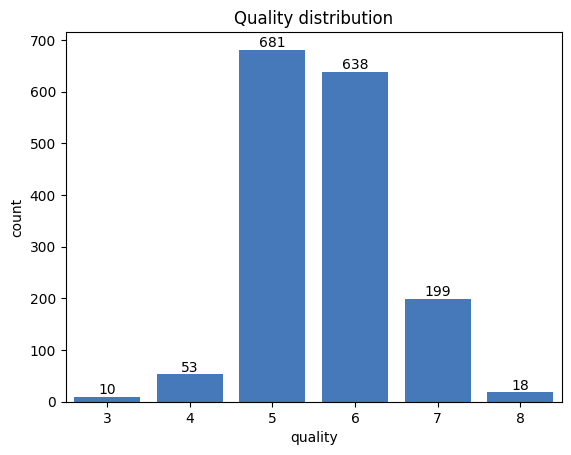

In [4]:
ax = sns.countplot(data=wine, x='quality', color='#37c')
ax.set_title('Quality distribution')
ax.bar_label(ax.containers[0])

print(f'Quantity of records = {wine.shape[0]}')
print(f'Quantity of attributes = {wine.shape[1]}')
# wypełnienie danych:
print(f'Quantity of missing attribute values = {wine.isnull().sum().sum()}')

Obserwujemy, że klasy nie są zbalansowane - występuje zdecydowana przewaga średnich jakościowo win nad definitywnie słabymi czy wybornymi. Rozkład jest zbliżony do Gaussowskiego. Pomimo skali zdefiniowanej jako 0-10, nie ma w zbiorze win ocenionych na *dziesiątkę* ani poniżej *trójki*.

### Analiza zakresów i stopnia zmienności atrybutów

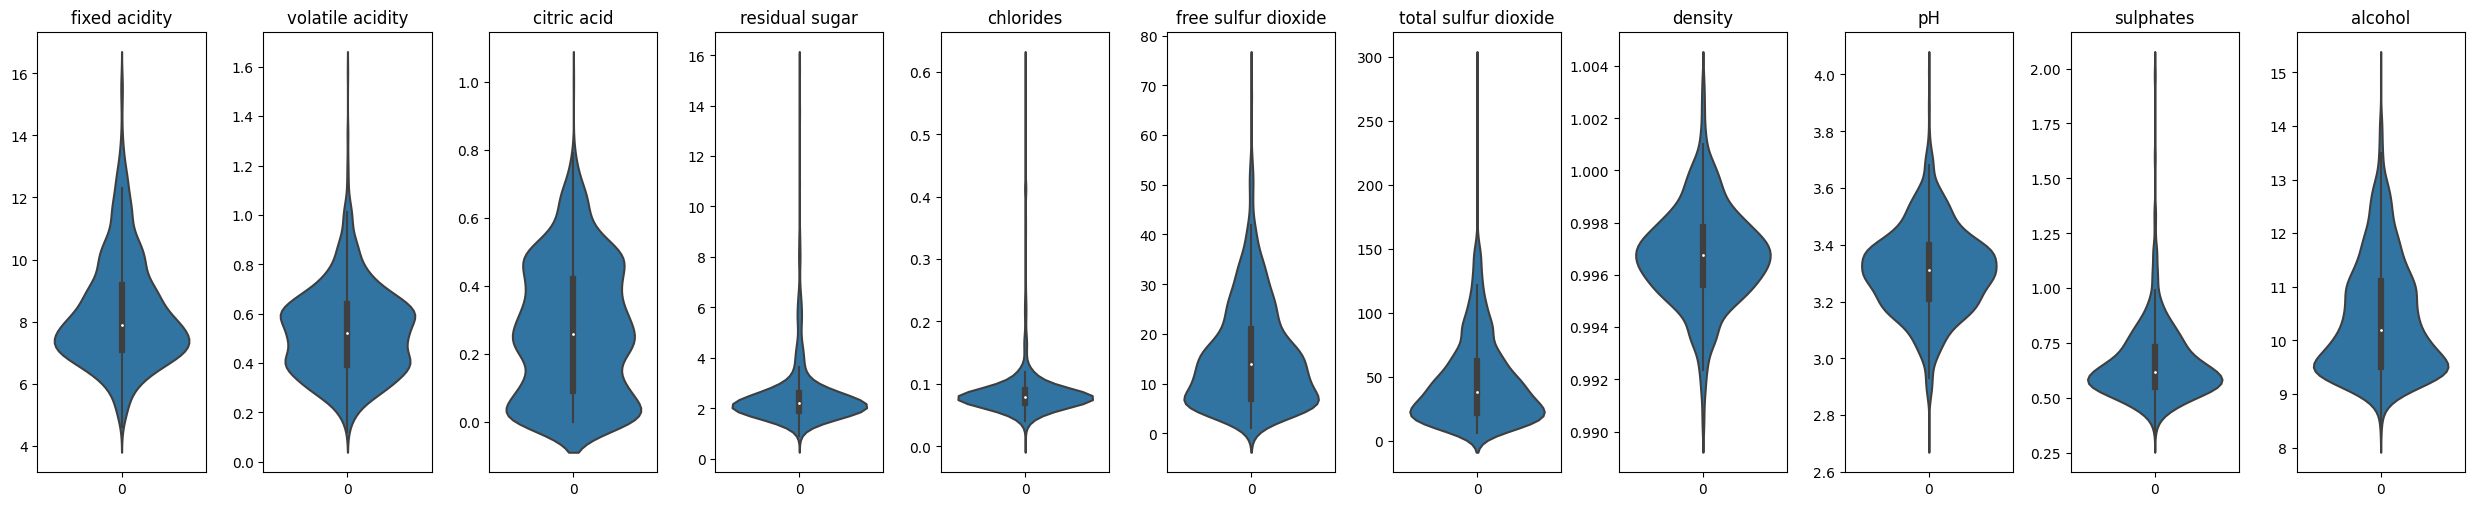

In [5]:
fig, axes = plt.subplots(1, len(wine.columns[:-1]))
fig.set_size_inches(25, 5)
fig.tight_layout()

for ax, attr in zip(axes, wine.columns[:-1]):
	sns.violinplot(wine[attr], ax=ax)
	ax.set_title(attr)

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Atrybuty charakteryzują się znacznie różnymi zakresami - w dalszej analizie, jak i przy tworzeniu modelu, może okazać się potrzebna standaryzacja danych (nie normalizacja min-max, bo zbiór zawiera dużo obserwacji odstających). Wiele cech charakteryzuje się rozkładem prawoskośnym - wyznaczenie logarytmu tych cech powinno wplynąć na jakość modelu.

### Badanie zależności
Z głównego zbioru wyznaczono podzbiory:  
* dolne 25% win
* górne 25% win  

na podstawie jakości. Celem jest znalezienie średnich wartości cech, które znacząco różnią się dla obu tych podzbiorów. Mogłoby to świadczyć o większej wadze tych cech w modelu regresji.

In [7]:
sumtotal = wine.shape[0]
wine_q1 = wine.nsmallest(sumtotal // 4, 'quality')
wine_q4 = wine.nlargest(sumtotal // 4, 'quality')

comparison = pd.DataFrame()
comparison['mean_top'] = wine_q4.describe().loc['mean', :]
comparison['mean_bottom'] = wine_q1.describe().loc['mean', :]
comparison['mean_diff'] = comparison['mean_top'] - comparison['mean_bottom']
comparison['std_total'] = wine.describe().loc['std', :]
comparison['importance'] = np.absolute(comparison['mean_diff'] / comparison['std_total'])
comparison

,mean_top,mean_bottom,mean_diff,std_total,importance
fixed acidity,8.939348,8.460150,0.479198,1.741096,0.275228
volatile acidity,0.445013,0.594862,-0.149850,0.179060,0.836870
citric acid,0.349925,0.273308,0.076617,0.194801,0.393306
residual sugar,2.641729,2.619549,0.022180,1.409928,0.015732
chlorides,0.082376,0.095614,-0.013238,0.047065,0.281271
free sulfur dioxide,14.141604,15.937343,-1.795739,10.460157,0.171674
total sulfur dioxide,38.456140,57.210526,-18.754386,32.895324,0.570123
density,0.996753,0.997449,-0.000696,0.001887,0.368530
pH,3.288772,3.299724,-0.010952,0.154386,0.070941
sulphates,0.728847,0.640602,0.088246,0.169507,0.520602


Wychodzi na to, że duże znaczenie przy ocenie wina mogą mieć
* zawartość alkoholu
* gęstość
* zawartość chlorków
* całkowita zawartość dwutlenku siarki
* zawartość kwasów lotnych  

Poniżej zbadano korelacje par cech w całym zbiorze.

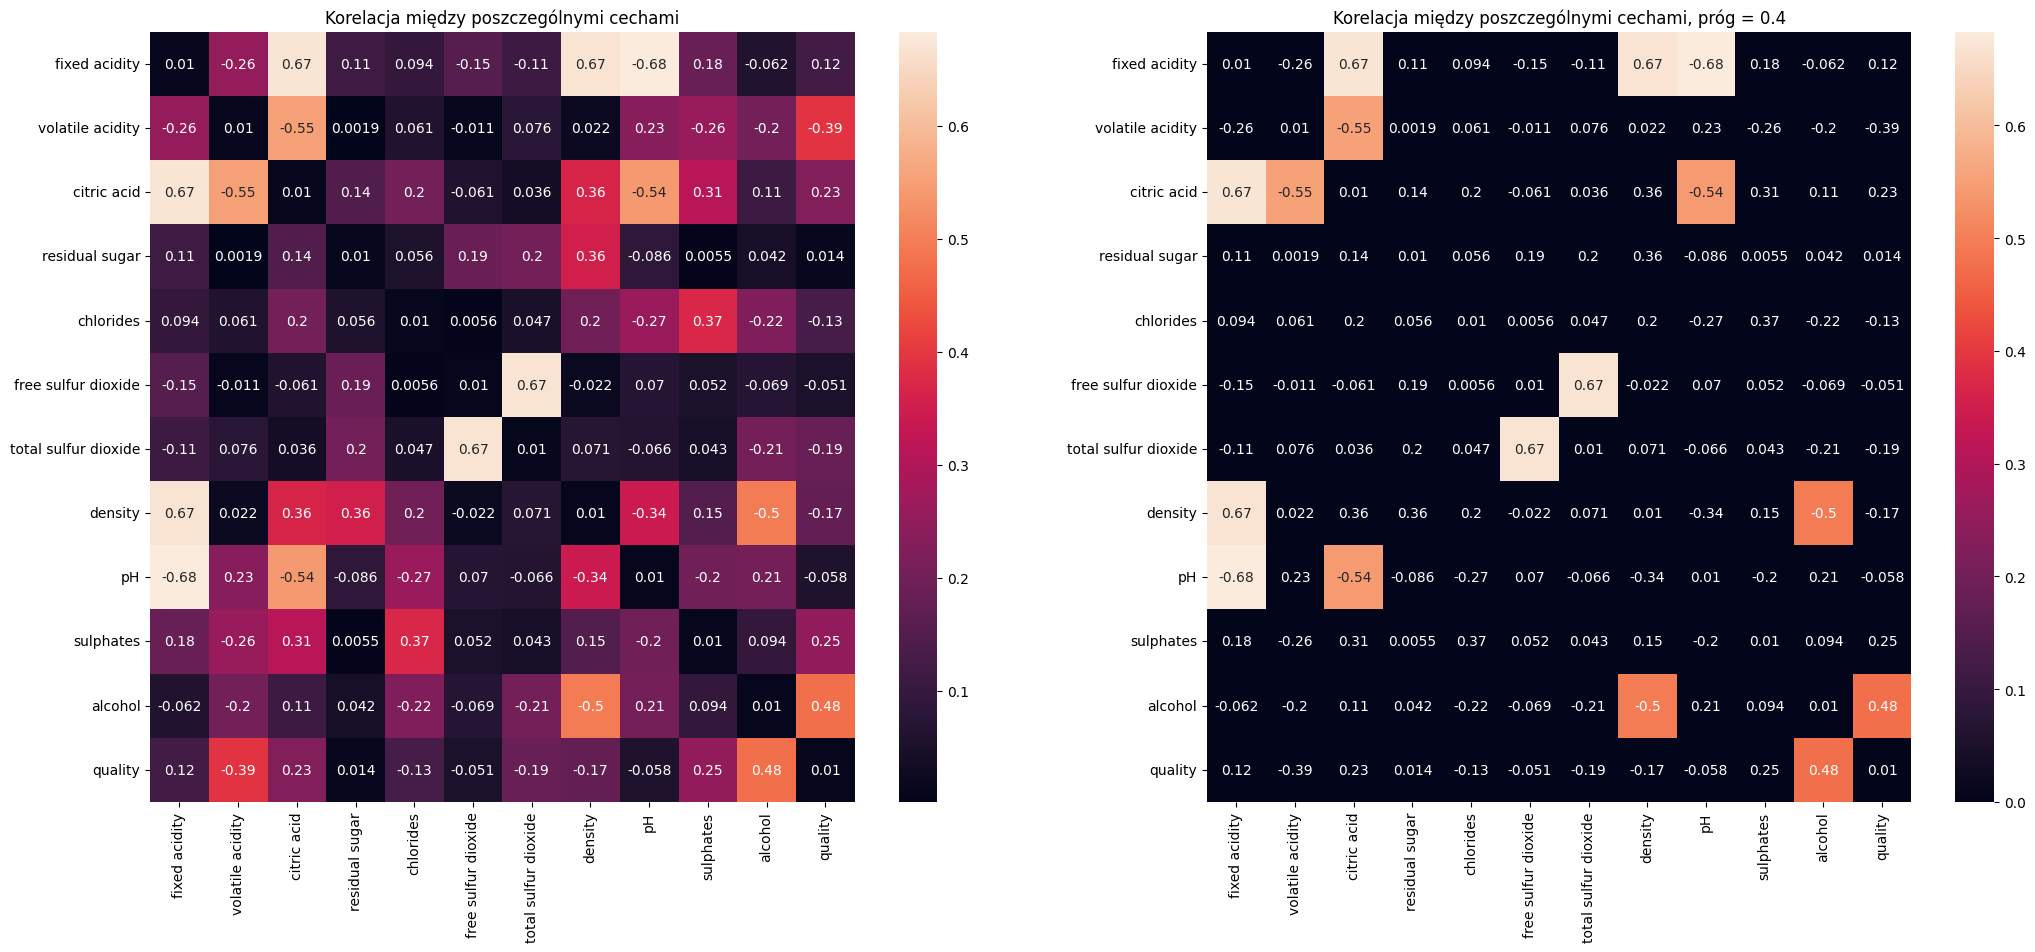

In [8]:
wine_corr = wine.corr()
# diagonalę "zerujemy" tak by zawierała się w zakresie [0.00062, 0.84] dzięki czemu skala kolorów lepiej odwzoruje interesujące nas dane
wine_corr = wine_corr - (np.identity(wine.columns.shape[0]) * 0.99)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(25, 10)
axes[0].set_title('Korelacja między poszczególnymi cechami')
sns.heatmap(abs(wine_corr), annot=wine_corr, ax=axes[0])

threshold = abs(wine_corr) * (abs(wine_corr) >= 0.4)
axes[1].set_title('Korelacja między poszczególnymi cechami, próg = 0.4')
ax = sns.heatmap(threshold, annot=wine_corr, ax=axes[1])

Najwięcej skorelowanych atrybutów (przynajmniej 3) obserwujemy dla cech: *alcohol*, *density*, *total sulfur dioxide* i *residual sugar*. Dodatkowo, są one powiązane przede wszystkim między sobą nawzajem.

Największą korelacją wykazały się *density* względem *residual sugar* oraz *density* względem *alcohol*. Dla gęstości, w zakresie progowania znajduje się także *total sulfur dioxide*. Świadczy to wprost o tym, że skład wina przekłada się na jego gęstość, co jest zgodne z intuicją. Widzimy też, że jedynym atrybutem o znaczącej ujemnej korelacji jest alkohol, co wskazuje na jego mniejszą gęstość względem pozostałych składników. Można by zatem w uproszczeniu przyjąć *density* jako uogólnienie pozostałych cech, równoważące się z *alcohol*.

Analizując korelacje alkoholu, obserwujemy przeważającą tendencję do spadku pozostałych atrybutów przy jego wzroście. Sugeruje to, że duża ilość alkoholu w winie zniweluje wpływ pozostałych jego cech. Co ciekawe, alkohol jest też jedynyną cechą w znaczący sposób skorelowaną z jakością, w dodatku pozytywnie. Zatem **powinna pojawić się ogólna tendencja do wzrostu jakości wina wraz z ilością zawartego w nim alkoholu**, co przyjmujemy za pierwszą część tezy badawczej do następnego etapu projektu.

Przy jakości pozostając, duża większość atrybutów ma na nią raczej delikatny wpływ, choć przeważnie negatywny. Wyjątek stanową wspomniany wcześniej *alcohol*, w pomijalnym stopniu *free sulfur dioxide* oraz poniekąd znaczący *pH*. Umacnia to hipotezę, że najlepszym sposobem na zwiększenie jakości wina będzie zwiększenie w nim stężenia alkoholu. Z negatywnych korelacji najsilniejsze są *density*, *chlorides* oraz *volatile acidity*, z czego to ostatnie jest bardzo słabo powiązane zarówno z gęstością jak i alkoholem, stąd warto mieć ten atrybut na szczególnej uwadze chcąc wykorzystać te dwa najbardziej znaczące. Za drugą część hipotezy badawczej więc przyjmujemy **możliwość wyłączenia z modelu paru cech znacząco skorelowanych z gęstością, ta bowiem jest negatywnie skorelowana z jakością**.

Trzecią częścią hipotezy będzie **przyjrzenie się wpływowi cechy *volatile acidity* na jakość**, gdyż ta nie jest znacząco skorelowana z pozostałymi cechami, a zdaje się mieć lekką korelację z jakością - aczkolwiek dalej poniżej progu. 

### Wizualizacja
Poniżej znajduje się wizualizacja korelacji wszystkich par atrybutów, dla których wsp, korelacji przekroczył ustalony wcześniej próg. Dla punktów danych pokazana jest również odpowiadająca jakość poszczególnych win.

In [9]:
high_corr_pairs = []
collen = len(wine.columns)

for i in range(collen):
	for j in range(i + 1, collen):
		if abs(corr := wine_corr.iloc[i, j]) >= 0.4:
			attr_pair = (wine_corr.columns[i], wine_corr.index[j], corr)
			high_corr_pairs.append(attr_pair)

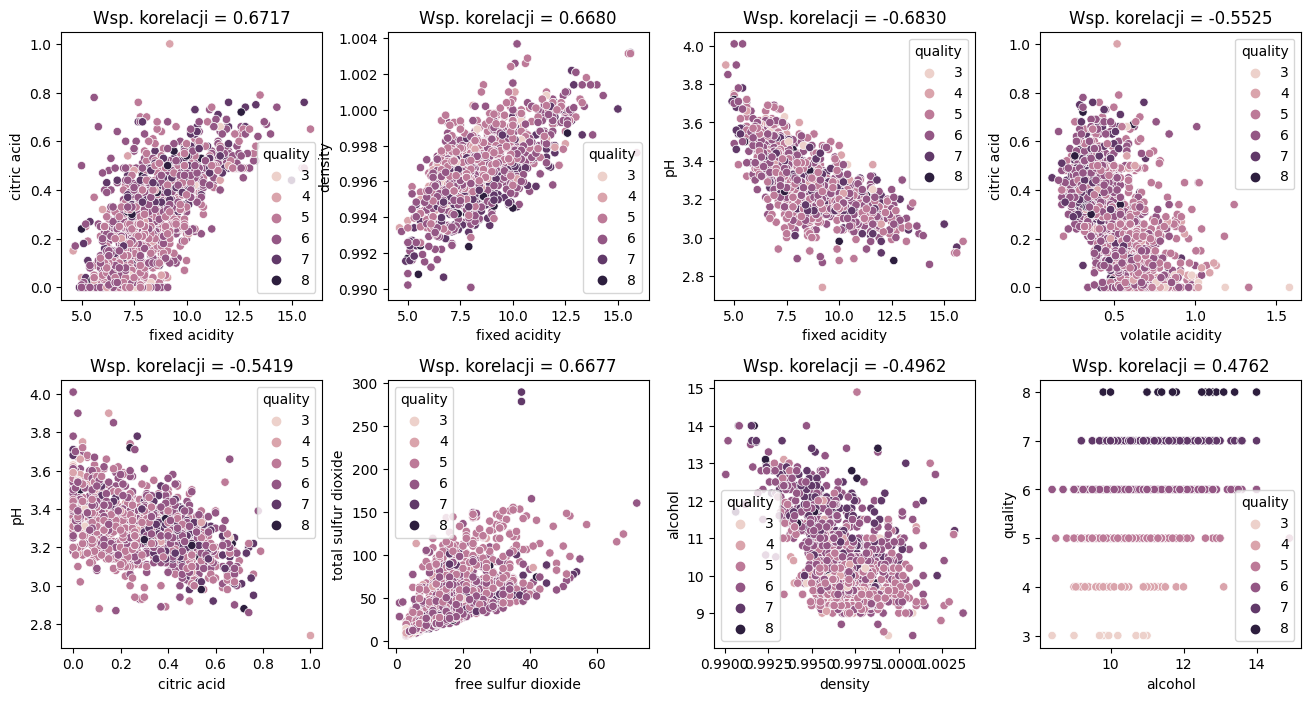

In [10]:
fig, axes = plt.subplots(2, len(high_corr_pairs) // 2)
fig.set_size_inches(16, 8)
fig.subplots_adjust(hspace=0.3, wspace=0.25)

for ax, pair in zip(axes.flatten(), high_corr_pairs):
	sns.scatterplot(data=wine, x=pair[0], y=pair[1], ax=ax, hue='quality')
	ax.set_title(f'Wsp. korelacji = {pair[2]:2.4f}')

Wizualizacja danych, których korelacje zostały przedstawione wyżej na heatmapie. Diagonala zawiera wykresy gęstości rozkładu danej cechy z podziałem na wynikową jakość. Pod diagonalą znajdują się wykresy punktowe par cech przedstawiające rozmieszczenie poszczególnych win dla zadanej pary. Kolory kategorii takie same jak w rycinie powyżej. Nad diagonalą zostały umieszczone dwuwymiarowe histogramy pokazujące gęstość rozmieszczenia obiektów na płaszczyznach par cech.

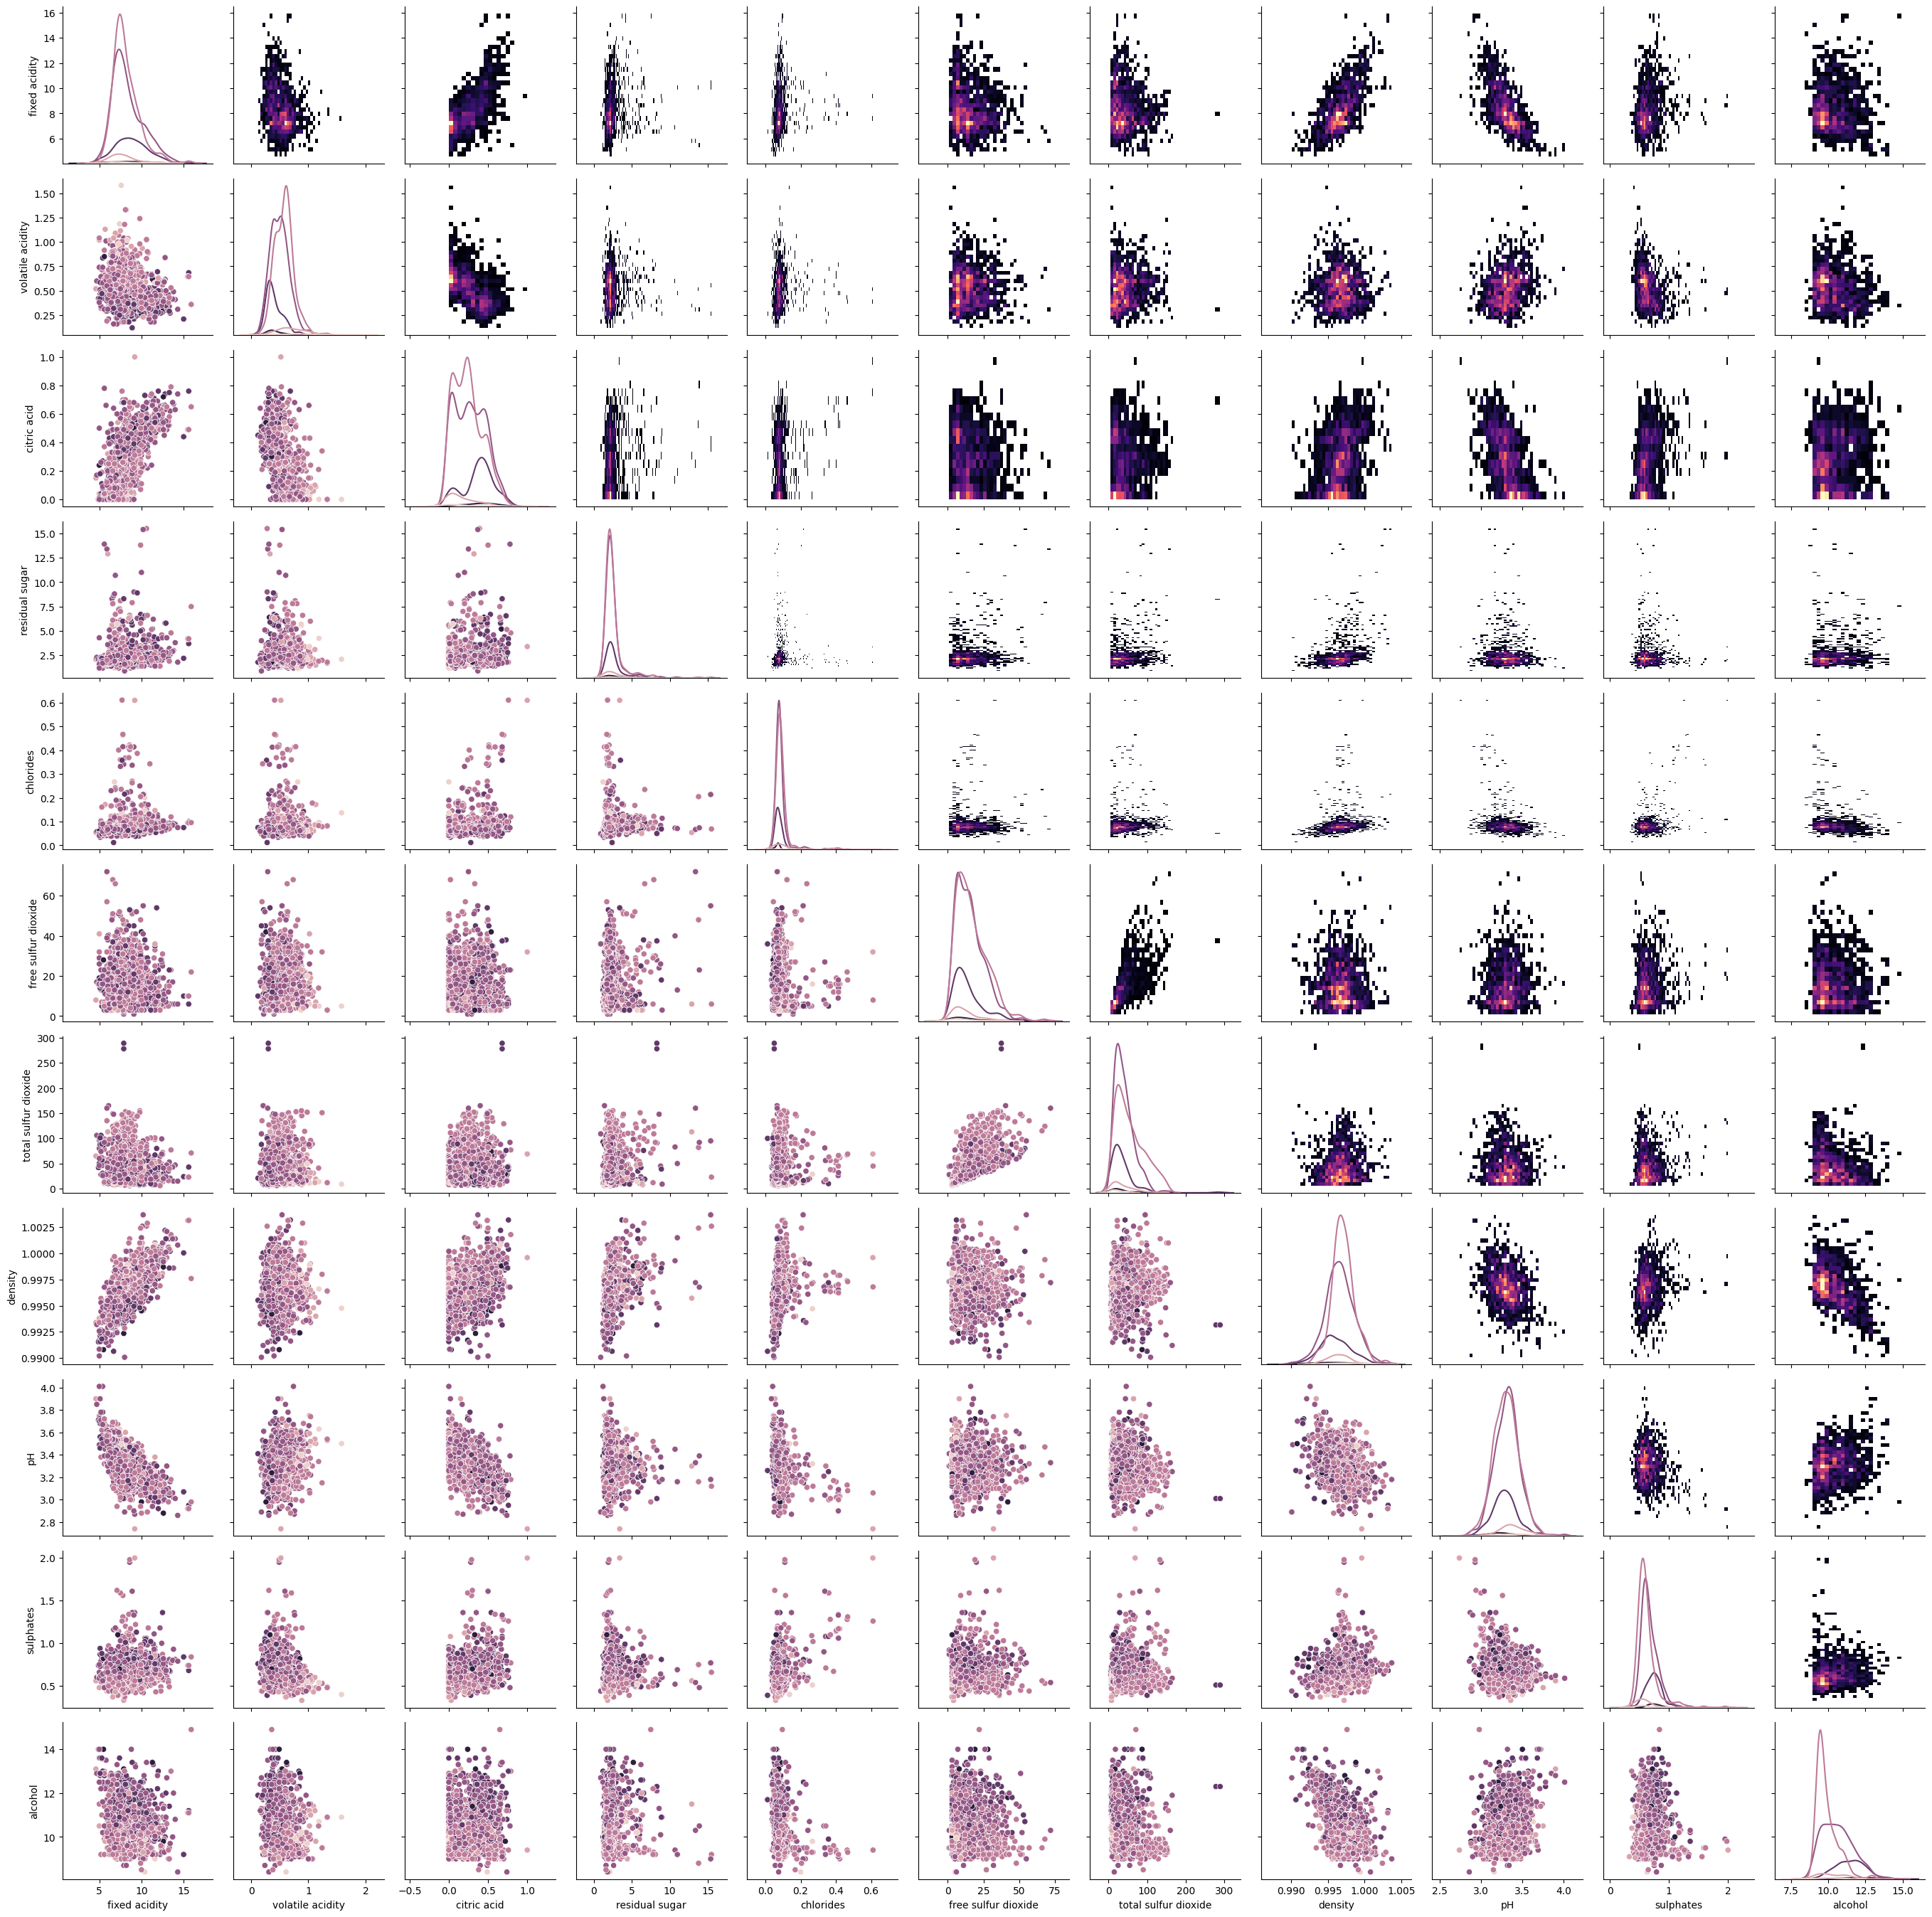

In [11]:
g = sns.PairGrid(wine.drop('quality', axis=1), diag_sharey=False, corner=False)
g.map_lower(sns.scatterplot, hue=wine['quality'])
g.map_diag(sns.kdeplot, hue=wine['quality'])
g.map_upper(sns.histplot, cmap='magma')

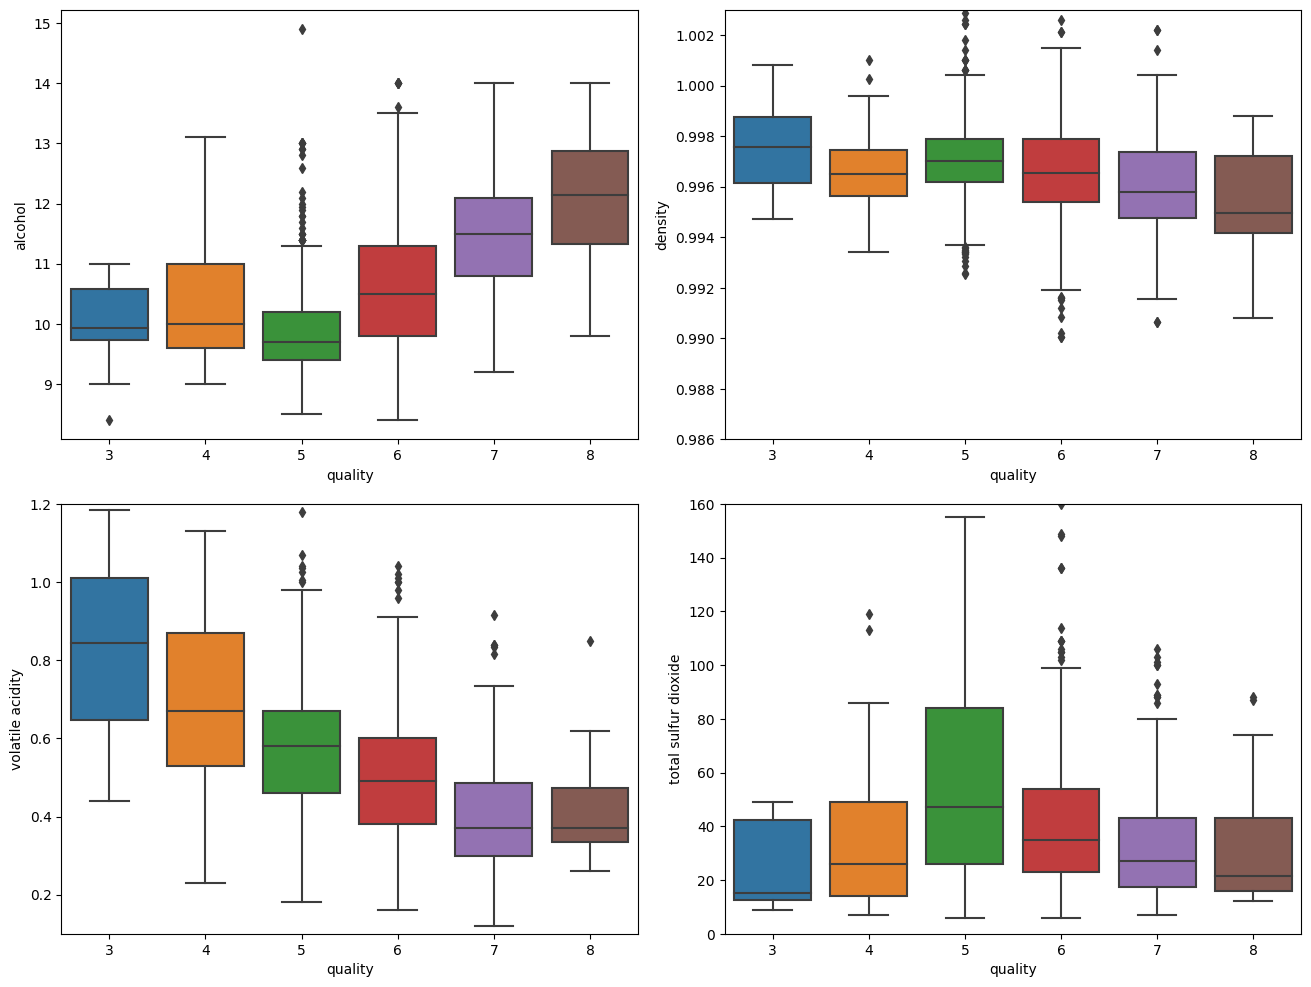

In [19]:
attrs = ('alcohol', 'density',      'volatile acidity', 'total sulfur dioxide')
lims =  (None,      (0.986, 1.003), (0.1, 1.2),        (0, 160))

fig, axes = plt.subplots(2, len(attrs) // 2)
fig.set_size_inches(16, 12)
fig.subplots_adjust(hspace=0.15, wspace=0.15)

for ax, attr, lim in zip(axes.flatten(), attrs, lims):
	sns.boxplot(data=wine, x='quality', y=attr, ax=ax)
	ax.set(ylim=lim)